In [11]:
(make-condition 'chem:linear-dihedral-error :atoms nil)

#<CHEM:LINEAR-DIHEDRAL-ERROR>

In [12]:
(core:getpid)

6419

In [4]:
(start-swank)

;; Swank started at port: 4005.


T

In [5]:
(ql:quickload :design)

To load "design":
  Load 1 ASDF system:
    design
; Loading "design"
[package design.load].............................
[package design.joint-tree].......................
[package design]..................................
[package design.graphviz-draw-joint-template].....
[package design.graphviz-draw-joint-tree].......


(:DESIGN)

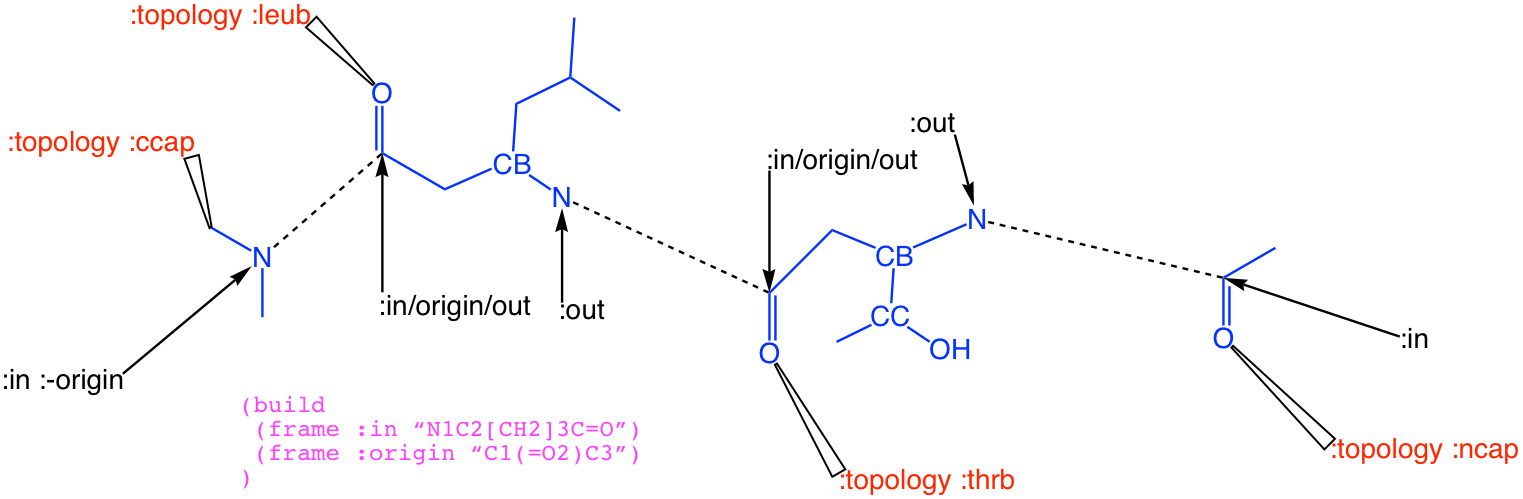

In [6]:
(cl-jupyter-user:png-from-file "foo.png")

In [7]:
(:= *be* (multiple-value-list (design.load::load-cdxml "foo.cdxml")))

*BE*

In [8]:
*be*

((#<TOPOLOGY  :name :LEUB.ORIGIN @0x11da922a8>
  #<TOPOLOGY  :name :LEUB @0x11d7ece48> #<TOPOLOGY  :name :NCAP @0x11d7ecb48>
  #<TOPOLOGY  :name :CCAP-ORIGIN @0x11d7ec728>
  #<TOPOLOGY  :name :THRB.ORIGIN @0x118456f68>
  #<TOPOLOGY  :name :THRB @0x118333788>)
 #<CHEM-DRAW >
 (#<PREPARE-TOPOLOGY LEUB.ORIGIN> #<PREPARE-TOPOLOGY LEUB>
  #<PREPARE-TOPOLOGY NCAP> #<PREPARE-TOPOLOGY CCAP-ORIGIN>
  #<PREPARE-TOPOLOGY THRB.ORIGIN> #<PREPARE-TOPOLOGY THRB>))

In [8]:
(:= *o* (design:make-oligomer '(:leub.origin (:origin :ccap-origin) :default :leub 
                                             :default :thrb
                                             :default :leub
                                             :default :ncap)))

do-coupling       part -> #<MONOMER :index 0 :monomer :LEUB.ORIGIN>
  (chem:get-one-monomer part) -> #<ISONAME >
      (type-of part) -> CHEM:MONOMER
  name -> :LEUB.ORIGIN
  (type-of name) -> KEYWORD
              topology -> #<TOPOLOGY  :name :LEUB.ORIGIN @0x121377ea8>
         out-plug-name -> :+ORIGIN
do-coupling       part -> #<MONOMER :index 0 :monomer :LEUB.ORIGIN>
  (chem:get-one-monomer part) -> #<ISONAME >
      (type-of part) -> CHEM:MONOMER
  name -> :LEUB.ORIGIN
  (type-of name) -> KEYWORD
              topology -> #<TOPOLOGY  :name :LEUB.ORIGIN @0x121377ea8>
         out-plug-name -> :+DEFAULT
do-coupling       part -> #<MONOMER :index 0 :monomer :LEUB>
  (chem:get-one-monomer part) -> #<ISONAME >
      (type-of part) -> CHEM:MONOMER
  name -> :LEUB
  (type-of name) -> KEYWORD
              topology -> #<TOPOLOGY  :name :LEUB @0x1213775a8>
         out-plug-name -> :+DEFAULT
do-coupling       part -> #<MONOMER :index 0 :monomer :THRB>
  (chem:get-one-monomer part) -> #<IS

*O*

In [9]:
(:= *aggs* (design::build-all-molecules *o*))

Gathering couplings
Making molecule
About to build first residue #<TOPOLOGY  :name :LEUB.ORIGIN @0x121377ea8>
About to build residue for next-topology #<TOPOLOGY  :name :CCAP-ORIGIN @0x120e89e48>
About to build residue for next-topology #<TOPOLOGY  :name :LEUB @0x1213775a8>
About to build residue for next-topology #<TOPOLOGY  :name :THRB @0x1211fa7e8>
About to build residue for next-topology #<TOPOLOGY  :name :LEUB @0x1213775a8>
About to build residue for next-topology #<TOPOLOGY  :name :NCAP @0x1213772a8>


*AGGS*

In [14]:
(:= *agg* (first *aggs*))

*AGG*

In [15]:
(:= *m* (chem:build-atom-id-map *agg*))

*M*

In [16]:
(:= *id* (chem:make-atom-id 0 0 2))

*ID*

In [17]:
(chem:lookup-atom *m* *id* )

#<ATOM :CB/:C>

In [18]:
(:= *conf* (kin:make-conformation (list *o*)))

The monomer #<MONOMER :index 0 :monomer :LEUB> doesn't have a coupling with plug name[:+ORIGIN]
The monomer #<MONOMER :index 0 :monomer :THRB> doesn't have a coupling with plug name[:+ORIGIN]
The monomer #<MONOMER :index 0 :monomer :LEUB> doesn't have a coupling with plug name[:+ORIGIN]


*CONF*

In [26]:
(kin:walk (kin:get-atom-tree *conf*) (lambda (x) (print x)))


#<JUMP-ATOM :C_55> 
#<ROOT-BONDED-ATOM :N> 
#<BONDED-ATOM :C_83> 
#<BONDED-ATOM :H_831> 
#<BONDED-ATOM :H_832> 
#<BONDED-ATOM :H_833> 
#<BONDED-ATOM :C_85> 
#<BONDED-ATOM :H_851> 
#<BONDED-ATOM :H_852> 
#<BONDED-ATOM :H_853> 
#<BONDED-ATOM :C_263> 
#<BONDED-ATOM :CB> 
#<BONDED-ATOM :N> 
#<ROOT-BONDED-ATOM :C_55> 
#<BONDED-ATOM :C_263> 
#<BONDED-ATOM :CB> 
#<BONDED-ATOM :N> 
#<ROOT-BONDED-ATOM :C_158> 
#<BONDED-ATOM :C_270> 
#<BONDED-ATOM :CB> 
#<BONDED-ATOM :N> 
#<ROOT-BONDED-ATOM :C_55> 
#<BONDED-ATOM :C_263> 
#<BONDED-ATOM :CB> 
#<BONDED-ATOM :N> 
#<ROOT-BONDED-ATOM :C_68> 
#<BONDED-ATOM :C_76> 
#<BONDED-ATOM :H_761> 
#<BONDED-ATOM :H_762> 
#<BONDED-ATOM :H_763> 
#<BONDED-ATOM :O> 
#<BONDED-ATOM :H> 
#<BONDED-ATOM :C_70> 
#<BONDED-ATOM :C_72> 
#<BONDED-ATOM :C_276> 
#<BONDED-ATOM :H_2761> 
#<BONDED-ATOM :H_2762> 
#<BONDED-ATOM :H_2763> 
#<BONDED-ATOM :C_278> 
#<BONDED-ATOM :H_2781> 
#<BONDED-ATOM :H_2782> 
#<BONDED-ATOM :H_2783> 
#<BONDED-ATOM :H_72> 
#<BONDED-ATOM :H_701> 
#<BONDED

NIL

In [20]:
*aggs*

(#<AGGREGATE :seq-0>)

In [21]:
(:= *agg* (first *aggs*))

*AGG*

In [22]:
(easy-gaff)

Warning!  Skipping 10-12 hbond

Warning!  Skipping force field atom equivalences



(#<FORCE-FIELD gaff.dat> #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [23]:
(energy:minimize *agg*)

minimize-no-fail
======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-log(Alpha)--Dir-------------Energy-----------RMSforce
 minSDnP       0     1      -inf   0.0              0.000           9994.177
DONE absolute force test:
forceRmsMag(2406.887967).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     2      -inf   0.0              0.000           2406.888
 minCGnP       0     3     -7.53  32.3         340821.094           1521.833
 minCGnP       0     4     -7.01  31.5          57266.350            642.239
 minCGnP       0     5     -7.35  31.8          20176.163            296.378
 minCGnP       0     6     -7.39  34.3          12459.456            155.782
 minCGnP       0     7     -6.83  50.2           8777.179            142.676
 minCGnP       0     8     -6.90  50.4           5769.176            111.731
 minCGnP       0     9     -6.93  47.7           3972.385             81.564
 minCGnP       0    10     -7.03  47.1   

#<ENERGY-FUNCTION >

In [24]:
(show *agg*)

A Jupyter Widget

In [25]:
*m*

#<ATOM-ID-TO-ATOM-MAP >

In [29]:
(graphviz-dot 'design.graphviz-draw-joint-template:draw-joint-template *jt* "temp")

Running:  dot -o temp.pdf -T pdf temp.dot 


0

In [18]:
(:= *olig* (core:make-cxx-object 'chem:oligomer))

*OLIG*

In [20]:
(apropos "atom-id")

CHEM:ATOM-ID
CHEM:ATOM-ID-TO-ATOM-MAP
CHEM:ATOM-WITH-ATOM-ID  Function
CHEM:BUILD-ATOM-ID-MAP  Function
CHEM:MAKE-ATOM-ID  Function


NIL

In [19]:
*olig*

#<OLIGOMER >

In [26]:
(design.oligomer::load-cdxml "foo.cdxml")

An error occurred of type: UNDEFINED-FUNCTION: 
  #<UNDEFINED-FUNCTION>


NIL

In [14]:
(print "Hello world")


"Hello world" 

"Hello world"